In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Load the dataset
df = pd.read_csv('FastagFraudDetection.csv')

In [27]:
# Convert Fraud_indicator to binary format
df['Fraud_indicator'] = df['Fraud_indicator'].map({'Fraud': 1, 'Not Fraud': 0})



In [28]:
# Handle missing values: Fill missing FastagID with a placeholder
df['FastagID'].fillna('Unknown', inplace=True)

In [29]:
# Extract features from Timestamp
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Hour'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek

In [30]:
# Drop the original Timestamp column as we have extracted useful features from it
df.drop(columns=['Timestamp'], inplace=True)

In [31]:
# Define features and target variable
X = df.drop(columns=['Transaction_ID', 'Vehicle_Plate_Number', 'Fraud_indicator'])
y = df['Fraud_indicator']

In [32]:
# List of numerical and categorical features
numerical_features = ['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed', 'Hour', 'DayOfWeek']
categorical_features = ['Vehicle_Type', 'FastagID', 'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Geographical_Location']


In [33]:
# Preprocessing pipelines for numerical and categorical features
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [34]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

In [35]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [36]:
# Apply preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [37]:
# Train a Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_processed, y_train)

RandomForestClassifier(random_state=42)

In [38]:
# Make predictions
y_pred = model.predict(X_test_processed)

In [39]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(report)


Accuracy: 0.972
Precision: 1.0
Recall: 0.8578680203045685
F1 Score: 0.9234972677595629
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       803
           1       1.00      0.86      0.92       197

    accuracy                           0.97      1000
   macro avg       0.98      0.93      0.95      1000
weighted avg       0.97      0.97      0.97      1000



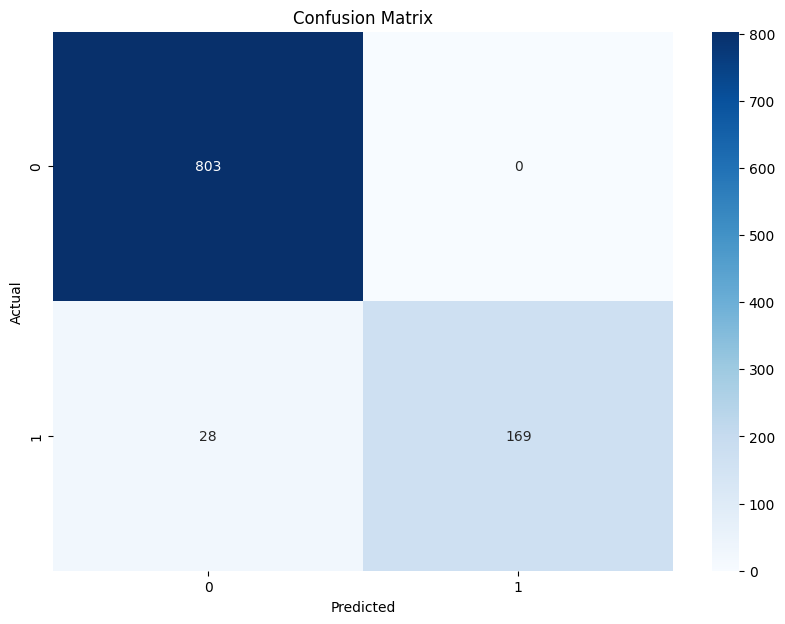

In [40]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

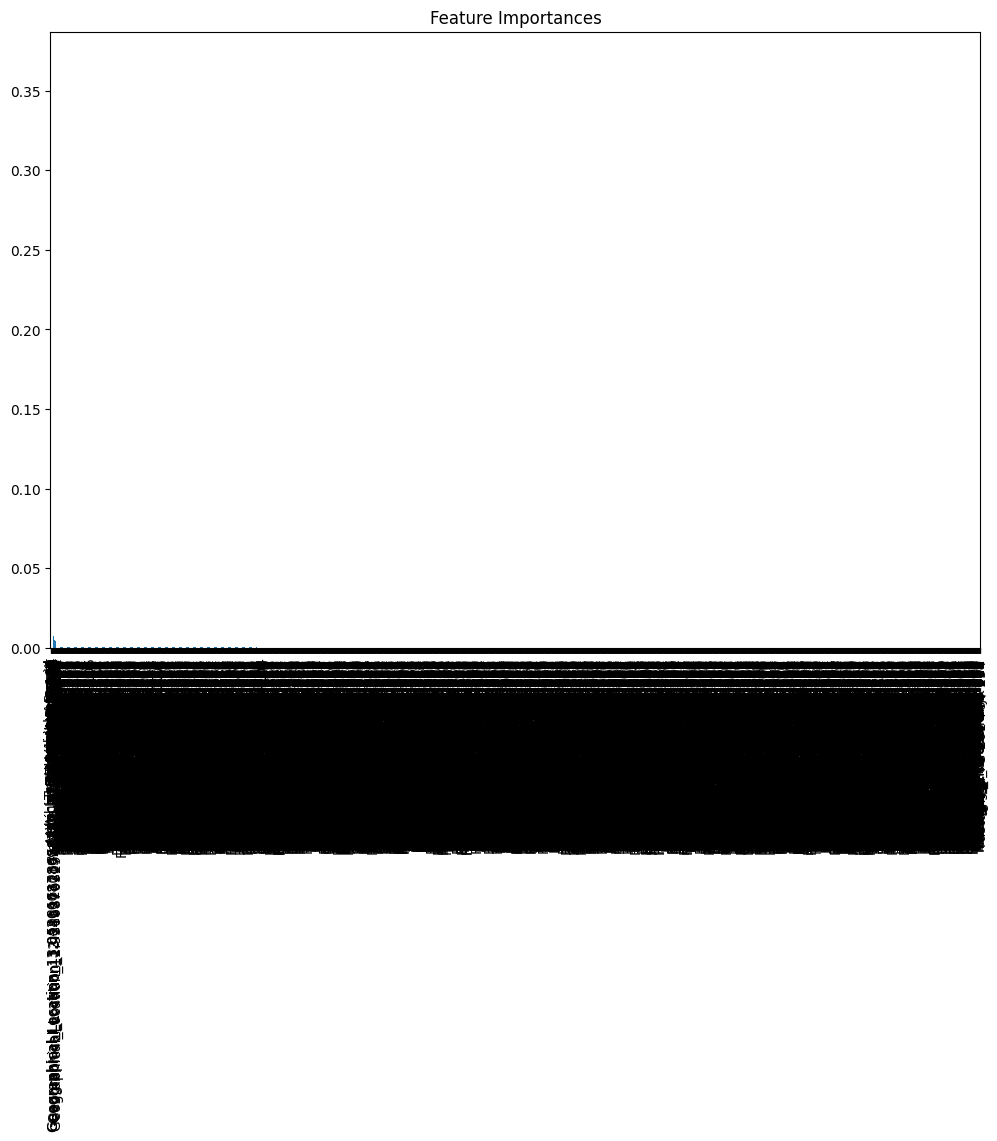

In [41]:
# Feature importances
feature_names = numerical_features + list(preprocessor.transformers_[1][1]['onehot'].get_feature_names_out(categorical_features))
feature_importances = pd.Series(model.feature_importances_, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
feature_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.show()